# Assignment 2

In [14]:
library(caTools)
library(ggplot2)
library(xtable)
library(hdm)
library(tidyr)
library(glmnet)
library(readxl)

In [15]:
(.packages())

[1] "readxl"    "glmnet"    "Matrix"    "tidyr"     "hdm"       "xtable"   
 [7] "ggplot2"   "caTools"   "stats"     "graphics"  "grDevices" "utils"    
[13] "datasets"  "methods"   "base"

## 2. Lasso 

### 2.1. Data

In [23]:
excel_sheets("C:/Users/VICTOR/Documents/GitHub/Lasso_Potential_Outcomes_RCTs/R/Input/Districtwise_literacy_rates.xlsx")

[1] "2015_16_Districtwise" "Metadata"

In [29]:
diccionario <- read_excel("C:/Users/VICTOR/Documents/GitHub/Lasso_Potential_Outcomes_RCTs/R/Input/Districtwise_literacy_rates.xlsx", sheet = "Metadata")
diccionario

Field Name,Description
<chr>,<chr>
STATCD,Data_Reported_from: State code
DISTCD,Data_Reported_from: District Code
STATNAME,Data_Reported_from: State name
DISTNAME,Data_Reported_from: District name
DISTRICTS,Data_Reported_from: No. of district
BLOCKS,Data_Reported_from: No. of blocks
VILLAGES,Data_Reported_from: No. of villages
TOTPOPULAT,Basic_data_from_Census_2011: Total_Population(in_1000's)
P_URB_POP,Basic_data_from_Census_2011: Percentage_Urban_Population


In [37]:
data <- read_excel("C:/Users/VICTOR/Documents/GitHub/Lasso_Potential_Outcomes_RCTs/R/Input/Districtwise_literacy_rates.xlsx", sheet = "2015_16_Districtwise")
data

STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,TOTPOPULAT,P_URB_POP,POPULATION_0_6,⋯,CLS5,CLS6,CLS7,TCH1,TCH2,TCH3,TCH4,TCH5,TCH6,TCH7
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,875564,11.33,197001.90,⋯,23,852,239,2708,5205,43,70,28,1065,638
1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,1015503,17.19,161871.18,⋯,30,1665,360,2937,5873,236,60,105,2533,964
1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,1269751,98.73,155798.45,⋯,0,2873,40,828,3647,1159,14,0,4757,129
1,104,JAMMU & KASHMIR,BADGAM,1,13,523,735753,11.74,150755.79,⋯,8,1035,325,1878,3892,250,68,19,1493,716
1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,570060,13.80,97651.28,⋯,5,1101,209,1336,2682,113,90,38,1414,506
1,106,JAMMU & KASHMIR,ANANTNAG,1,12,523,1070144,26.04,206323.76,⋯,22,1592,185,2084,6182,261,74,95,2491,597
1,107,JAMMU & KASHMIR,LEH (LADAKH),1,6,110,147104,42.96,11812.45,⋯,17,473,0,470,1160,62,19,45,813,0
1,108,JAMMU & KASHMIR,KARGIL,1,7,134,143388,8.89,20404.11,⋯,3,220,99,471,1582,90,44,17,274,288
1,109,JAMMU & KASHMIR,DODA,1,10,388,409576,7.95,71020.48,⋯,36,766,36,1867,3010,266,41,172,1391,102


In [38]:
# Keep only the observations with no missing values
data <- na.omit(data)

In [32]:
# Ver tipo de variables
str(data)

tibble [625 × 100] (S3: tbl_df/tbl/data.frame)
 $ STATCD        : num [1:625] 1 1 1 1 1 1 1 1 1 1 ...
 $ DISTCD        : num [1:625] 101 102 103 104 105 106 107 108 109 110 ...
 $ STATNAME      : chr [1:625] "JAMMU & KASHMIR" "JAMMU & KASHMIR" "JAMMU & KASHMIR" "JAMMU & KASHMIR" ...
 $ DISTNAME      : chr [1:625] "KUPWARA" "BARAMULA" "SRINAGAR" "BADGAM" ...
 $ DISTRICTS     : num [1:625] 1 1 1 1 1 1 1 1 1 1 ...
 $ BLOCKS        : num [1:625] 13 18 8 13 8 12 6 7 10 11 ...
 $ VILLAGES      : num [1:625] 391 678 94 523 359 523 110 134 388 361 ...
 $ TOTPOPULAT    : num [1:625] 875564 1015503 1269751 735753 570060 ...
 $ P_URB_POP     : num [1:625] 11.3 17.2 98.7 11.7 13.8 ...
 $ POPULATION_0_6: num [1:625] 197002 161871 155798 150756 97651 ...
 $ GROWTHRATE    : num [1:625] 34.6 20.3 23.6 21.2 29.2 ...
 $ SEXRATIO      : num [1:625] 843 873 879 883 913 937 583 775 922 863 ...
 $ P_SC_POP      : num [1:625] 0.12 0.15 0.09 0.05 0.07 ...
 $ P_ST_POP      : num [1:625] 8.08 3.74 0.72 3.17 4.0

In [35]:
class(data$MALE_LIT)
is.factor(data$MALE_LIT)

[1] "numeric"

[1] FALSE

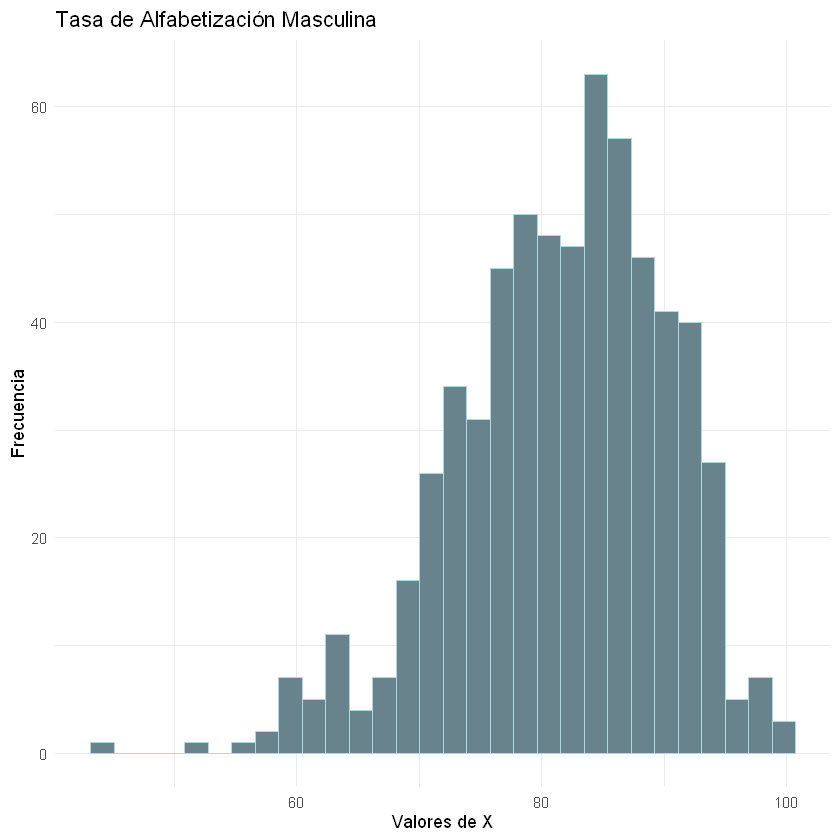

In [53]:
# Histograma
hist_male <- ggplot(data, aes(x = as.numeric(MALE_LIT))) +
  geom_histogram(bins = 30,
                 color = "#ADD8E6",
                 fill = "#68838B",          
                 alpha = 1) +
  labs(title = "Tasa de Alfabetización Masculina", 
       x = "Valores de X",        
       y = "Frecuencia") +
theme_minimal()
hist_male

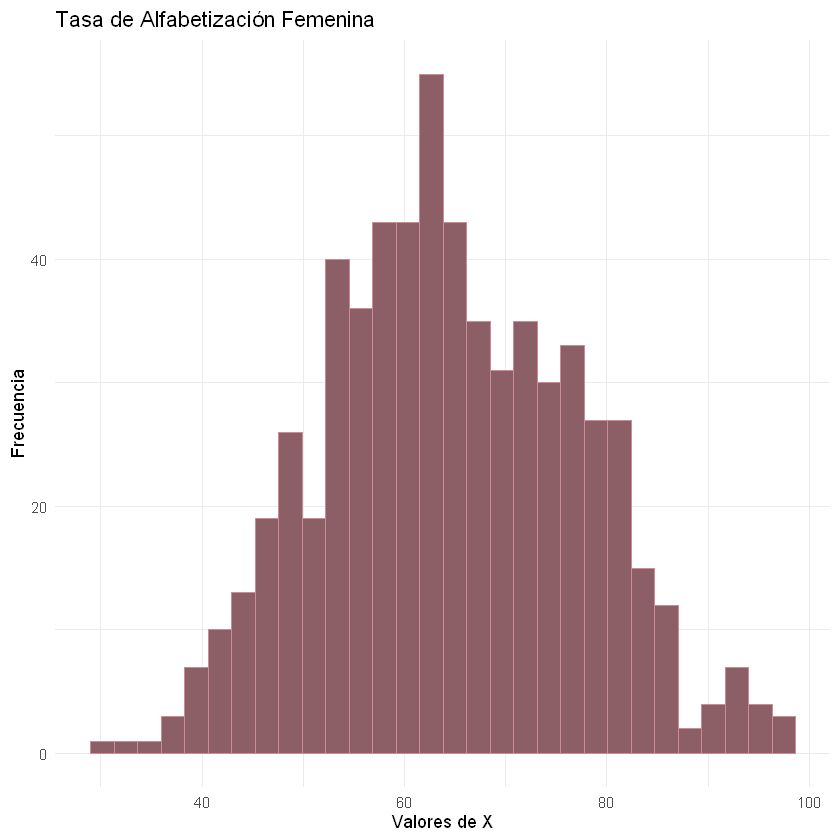

In [55]:
# Histograma
hist_female <- ggplot(data, aes(x = as.numeric(FEMALE_LIT))) +
  geom_histogram(bins = 30,
                 color = "#CD8C95",
                 fill = "#8B5F65",          
                 alpha = 1) +
  labs(title = "Tasa de Alfabetización Femenina", 
       x = "Valores de X",        
       y = "Frecuencia") +
theme_minimal()
hist_female

> El ***histograma de hombres*** tiene una distribución asimétrica a la izquierda, con pocas observaciones para tasas menores a 60%, y la dispersión se concentra alrededor del 90%. Mientras que el ***histograma de mujeres*** tiene una distribución más uniforme y con más dispersión de los datos, pues tienen más observaciones para tasas menores a 60%. Finalmente, el promedio es mayor en el de los hombres.

### 2.2. Low-dimensional specification
-Se selecciona FEMALE_LIT como Y y los siguientes covariados: P_URB_POP , SEXRATIO , P_SC_POP , P_ST_POP , TOTPOPULAT , SCHTOT , SELE ,OVERALL_LI , GROWTHRATE 

In [ ]:
# Divido data en train y set
set.seed(1234)
sample_low <- sample.split(data$FEMALE_LIT, SplitRatio = 0.75)
train_low <- subset(data, sample_low == TRUE)
test_low <- subset(data, sample_low == FALSE)

# Low-dimension
covariados_low <- "P_URB_POP + SEXRATIO + P_SC_POP + P_ST_POP + TOTPOPULAT + SCHTOT + SELE + OVERALL_LI + GROWTHRATE"
formula_low <- as.formula(paste("FEMALE_LIT","~",covariados_low))

# Train y Test parsimonia
model_low_train <- model.matrix(formula_low, train_low)
model_low_test <- model.matrix(formula_low, test_low)



In [ ]:
# Cross-validation
